In [ ]:
# !pip install seaborn

In [9]:
import numpy as np
import pandas as pd
from datetime import datetime
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import IsolationForest

In [10]:
total_records_df = pd.read_csv('forecasts.csv',names=['Time','Count'],header=0)

In [11]:
total_records_df['Time'] = pd.to_datetime(total_records_df['Time'],utc=True)
total_records_df = total_records_df.set_index('Time')
total_records_df = total_records_df.sort_index()
total_records_df

,Count
Time,
2021-11-08 00:00:00+00:00,3.537451e+04
2021-11-08 00:15:00+00:00,6.910854e+05
2021-11-08 00:30:00+00:00,6.357190e+05
2021-11-08 00:45:00+00:00,1.705001e+04
2021-11-08 01:00:00+00:00,4.498343e+05
...,...
2021-11-14 22:45:00+00:00,9.761083e+03
2021-11-14 23:00:00+00:00,6.035553e+04
2021-11-14 23:15:00+00:00,1.178319e+06


In [12]:
total_records_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 672 entries, 2021-11-08 00:00:00+00:00 to 2021-11-14 23:45:00+00:00
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Count   672 non-null    float64
dtypes: float64(1)
memory usage: 10.5 KB


In [13]:
table_names = ['Time','mrc_vttk','eu2_mchb','mrc_lqua','mrc_mard','mrc_qals','llv_lot_sampling_point','eu2_qals','sus_mkpf','sus_mchb','apc_mard','bbl__sopromet_zzlrv','elm_u_qccampaign','llv_c_lot_splits','bbl_vbuk','elm_s_sample','cla_lagp','eu2_vbuk','bbl__sopromet_bomuv','eu2_mkpf','eu2_qapp','elm_sdidata','tai_afvc','llv_c_lot_tray','mrc_mkpf','eu2_aufm','eu2_chvw','mrs_vbep','apc_lqua','tai_afvv','eu2_aufk','mrc_eket','eu2_afvc','eu2_qamv','tai_cobk','mrc_ekpo','eu2_afko','bbl_vbbe','elm_sdidataitem','eu2_qasv','sus_mseg','sus_aufm','eu2_mcha','jet_f41021','mrc_mseg','bbn_vbuk','mrc_likp','elm_sdidataitemspec','sus_resb','eu2_vbup','apc_mkpf','eu2_likp','elm_u_lot','bbl_mchb','mrs_vbup','mrs_vbuk','bbl_jest','eu2_afru','eu2_jcds','sus_chvw','bbl_vbap','eu2_qamr','mrc_vbpa','apc_afko','apc_aufk','eu2_mseg','hcs_vbup','mrc_vetvg','eu2_resb','mrc_vbuk','mrs_vbap','mrc_lips','apc_vbup','eu2_qasr','eu2_jest','hcs_vbuk','bbl_vbup','cla_ltak','sus_jest','cla_lqua','eu2_vbpa','apc_afpo','bbn_afko','eu2_qase','eu2_ausp','mrc_ekbe','llv_c_lot_incubation','tai_coep','apc_ekbe','bbl_vbep','bbl_mkpf','eu2_afpo','bbn_lips','hcs_vbbe','bbl_vbpa','bbl_lqua','hcs_vbpa','apc_mseg','elm_u_qcorder','bbn_vbup','eu2_lips','hcs_vbak','eu2_jsto','bbn_vbpa','bbl_lagp','bbn_ekbe','bbl_mseg','apc_likp','hcs_vbep','bbn_likp','bbl__bitmym_case','bbl_vbfa','bbl_lips','bbl_likp','gmd_f4108','bbl_equi','apc_qals','gmd_f4211','cla_ltap','hcs_vbap','bbn_mkpf','bbl_vbkd','cla_mkpf','eu2_qamb','mrc_vbup','apc_eket','geu_vbuk','geu_vbup','hcs_likp','eu2_qmih','eu2_qmel','sus_afvu','sus_afvc','cla_mseg','cla_ltbk','pda_mkpf','mrs_vbpa','pda_mchb','sus_afvv','gmd_f4201','apc_lips','mrs_vbfa','mrs_likp','p01_vbup','apc_vbak','bbl_objk','sus_afko','apc_vbap','p01_vbep','sus_aufk','pda_mseg','bbl_ltak','mrc_vbfa','bw2_f41021','p01_vbuk','eu2_afih','apc_vbep','bbn_qals','apc_ekpo','pda_chvw','bbl_vbak','p01_vbap','cla_ltbp','geu_vbak','mrs_eket','gmd_f4311','sus_ausp','mbp_vbep','apc_vbkd','geu_vbpa','bw2_f4801_adt','bbl_eket','geu_likp','mrs_lips','bbn_eket','bbn_ekpo','sus_mch1','mrs_vbak','cla_vbuk','apc_ekes','rft_lot','bbl_ltap','pda_aufm','mrs_ekpo','geu_vbap','cla_vbup','geu_vbep','pda_qals','sus_afih','bbn_afpo','rft_tracked_object_status','rft_dc_eth_dcs_lotcompletion','bw2_f4108_adt','atl_mkpf','atl_jest','atl_mchb','rft_tracked_object_history','mbp_vbap','apc_vbrk','bw2_f3112','pda_qamb','rft_dc_eth_dcs_batch_identify','atl_qamr','mrs_ekbe','cla_vbbe','rft_work_order_items','atl_qals','rft_lot_flow_tracking','gmd_f43121','sus_afru','pda_afpo','atl_bkpf','atl_mseg','hcs_vbfa','llv_storage_location','p01_vbak','atl_chvw','rft_work_order','bw2_f0911','mbp_vbup','apc_vbrp','bbl_zsd_order_block','hcs_lips','atl_afvc','bw2_f4311_adt','eu2_inob','bbn_ekko','sus_jsto','atl_afvu','cla_likp','atl_aufm','geu_lips','geu_eket','eu2_mch1','gmd_f43099','apc_vetvg','gmd_f43092','hcs_mchb','bbl_ekpo','cla_vbfa','gmd_f41021','mrs_ekes','p01_vbpa','sus_qmih','sus_qmel','p01_likp','mbp_vbuk','sus_afpo','atl_resb','bw2_f43121','bbl__bitmym_vbpa','eu2_ekbe','eu2_qave','atl_afpo','cla_lips','bbl_vekp','geu_ekbe','bbl_vepo','eu2_eket','djd_f41021','llc_sample','eu2_ekpo','bbl_vbrk','llc_test','atl_qamv','bbl_ekbe','p01_lips','geu_ekpo','sus_inob','mrc_vbkd','pda_vbuk','bbl_mch1','cla_vbpa','eu2_ypm00001','mbp_vbak','sus_mcha','bw2_f4211','pda_vbup','bbl_ekes','mrc_vbap','bbl__sopromet_gatein','bw2_f4201','bbl_ltbp','mrc_vbak','llc_result','cla_eket','atl_aufk','mbp_vbpa','atl_afko','mbp_likp','bbn_vbap','bbl_ltbk','mrc_vbep','eu2_ypb00078','bbl_vrkpa','apc_eban','pda_jest','pda_vbpa','atl_qapp','bbl_vbrp','mrs_ekko','mbp_lips','atl_qasr','atl_qasv','cla_vbak','bbn_vbep','mrc_ekko','apc_ekko','rft_at_eth_dhr_order','bbn_vbak','bbn_ekes','cla_vbap','bw2_f3102','gmd_f4209','cla_objk','atl_qamb','eu2_yinm0092','elm_reagentlot','atl_mch1','rft_dc_eth_dcs_equipmenttracking','pda_likp','hcs_eket','bbl_ekko','cla_vbep','pda_vbak','cla_ztf2s_expedic','llc_lot','hcs_ekpo','pda_vbep','cla_ekpo','pda_vbap','cla_vbkd','bbl_j_1bnfdoc','eu2_ekes','bbl_j_1bnflin','cla_ekbe','eu2_yemrec01','cem_dlytrn','eu2_vbap','sus_ekpo','bw2_f43092','apc_plaf','cla_vbrk','rft_dc_eth_dcs_quarantinelog','amo_mara','eu2_ekko','bw2_f43099','pda_eket','pda_resb','atl_vbup','sus_qals','atl_vbuk','p01_ekpo','djd_f4211','pda_ekpo','sus_qamv','cla_vrkpa','eu2_vbep','mrc_eban','p01_eket','cem_locmst','hcs_ekko','cla_vbrp','sus_qapp','cem_trlract','geu_ekko','bw2_f4102_adt','pda_mch1','pda_lips','cem_trlr','sfl_ordem__c','mbp_eket','pda_aufk','sfl_notafiscal__c','djd_f4201','eu2_vbak','djd_f4108','bbl_rseg','bba_vbuk','cla_j_1bnfdoc','bbl_rbkp','atl_vbpa','bba_mard','pda_afko','pda_ekbe','bba_vbup','meb_currentstatus','bba_lips','geu_mlit','rft_uda_orderitem','meb_container','atl_mcha','atl_vbap','mbp_ekbe','mrc_vttp','cla_j_1bnflin','meb_datapointhistorydetail','cla_rbkp','cla_vttk','meb_datapointhistory','meb_historymainline','hcs_ekes','meb_executetaskhistory','meb_userattribute','djd_f43121','bbl_mcha','bba_vbpa','p01_ekko','atl_vbak','cla_ekko','p01_ekes','bba_likp','bbl_ikpf','mbp_ekpo','djd_f4311','cla_rseg','djd_f43092','bbl_iseg','pda_ausp','cem_wrkque','cem_invdtl','cem_invlod','p01_ekbe','atl_vbep','sus_qasr','djd_f43099','sus_qamr','atl_ausp','bba_eket','meb_esighistorysummary','meb_esighistorydetail','bba_ekpo','eu2_mslb','bba_vbfa','bw2_f5648002_adt','elm_study','hcs_ekbe','atl_eket','sus_qasv','elm_s_product','elm_spec','cem_rcvlin','mbp_ekko','elm_specparamlimits','sus_qamb','eu2_qmur','cem_rcvtrk','sus_ekko','mrc_plaf','cem_invsub','atl_ekpo','atl_likp','pda_jsto','cem_invact','elm_speclimittype','cla_ztc2c_header_edi','cla_ztc2c_item_edi','eu2_s070','eu2_vbkd','meb_historycrossref','elm_specparamitems','geu_ekes','meb_qtyhistorydetails','cla_link','cla_linv','meb_qtyhistory','cem_rcv_hst','cla_vttp','bba_ekko','bba_vbap','cla_linp','bba_vbep','atl_lips','elm_s_productdepartment','pda_ekko','bba_vbak','cem_rcvinv','pda_inob','cem_rplwrk','atl_ekbe','bbl_vttk','sus_zqstandard_used','cla_vtts','cla_iseg','cla_ikpf','pda_mcha','elm_s_samplepoint','cem_pckwrk_dtl','atl_ekko','eu2_yti_e_cal_lab','cem_shipment_line','cem_shipment','cem_pckwrk_hdr','elm_u_event','meb_associatehistory','bbl_link','meb_associatehistorychildcnts','atl_qave','bbl_linp','bbl_linv','bbn_plaf','cem_ord','eu2_mdkp','bba_ekbe','cem_car_move','sus_qave','atl_eban','sjd_f4311','bbl_vttp','eu2_rsdb','pda_qasv','cem_ord_line','pda_qamv','atl_inob','bba_ekes','cem_stop','fsn_mara','cem_invlod_hist','cem_invdtl_hist','cem_invsub_hist','bbl_vtts','cem_supmst','bw2_f4209','mrc_vbrk','fsn_marc','rft_dc_eth_dcs_holdlog','elm_u_specparam','pda_qamr','mrc_vbrp','pda_qave','atl_ekes','cla_vepo','cla_vekp','mrc_qmur','pda_ekes','eu2_yslsgrc','atl_vbrk','cla_ztc2c_edi_item','cla_ztc2c_edi_header','atl_qase','atl_vbrp','hcs_resb','max_workorderspec']

In [14]:
table_records_df = pd.read_csv('forecasts_tables.csv',names = table_names,header=0)

In [15]:
table_records_df['Time'] = pd.to_datetime(table_records_df['Time'],utc=True)
table_records_df = table_records_df.set_index('Time')
table_records_df = table_records_df.sort_index()
table_records_df

,mrc_vttk,eu2_mchb,mrc_lqua,mrc_mard,mrc_qals,llv_lot_sampling_point,eu2_qals,sus_mkpf,sus_mchb,apc_mard,...,mrc_qmur,pda_ekes,eu2_yslsgrc,atl_vbrk,cla_ztc2c_edi_item,cla_ztc2c_edi_header,atl_qase,atl_vbrp,hcs_resb,max_workorderspec
Time,,,,,,,,,,,,,,,,,,,,,
2021-11-08 00:00:00+00:00,110.707709,36.440214,17.067349,181.743930,5.746485,14.218893,3.592458,7.909656,5.965394,17.204566,...,0.113948,0.466247,14.265415,6.892516,217.729402,31.252719,0.501544,23.162956,2.131462,0.030359
2021-11-08 00:15:00+00:00,243.244622,49.774507,25.317710,108.200307,12.351571,14.612469,4.172111,14.098373,8.922674,18.870683,...,0.002837,0.381956,11.598606,14.873977,177.083450,15.318379,0.282574,107.934680,2.418593,0.185005
2021-11-08 00:30:00+00:00,30.594065,63.398391,13.913833,162.361485,5.695538,10.559721,5.666933,6.906937,6.961442,13.712454,...,0.052719,0.082196,11.868109,1.314856,58.076542,1.426521,0.055372,14.181897,2.388944,0.023305
2021-11-08 00:45:00+00:00,113.863080,8.965382,55.244519,48.606969,4.772901,14.077865,86.074413,10.462519,0.794064,17.659592,...,0.076911,0.257089,13.204296,1.421276,195.294937,28.175306,0.894646,7.405110,2.236358,0.050338
2021-11-08 01:00:00+00:00,552.017427,98.342044,505.569039,574.938673,51.602929,29.610894,36.389348,37.879062,42.812644,38.011168,...,0.267171,0.689339,15.710130,9.726898,129.460763,12.769184,3.205602,7.236284,2.714486,0.313965
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-11-14 22:45:00+00:00,230.623827,55.244179,432.271785,145.705745,19.724528,6.927024,78.024506,3.430842,3.195127,11.383298,...,0.000000,1.079301,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2021-11-14 23:00:00+00:00,161.771991,95.789040,448.361414,151.863251,17.220400,9.373194,50.799953,4.002780,3.864390,13.561259,...,0.000000,0.990015,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2021-11-14 23:15:00+00:00,9.507837,52.510090,344.479067,34.884615,7.698946,8.911700,42.264781,5.207459,3.681026,12.298233,...,0.000000,1.204300,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [16]:
table_records_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 672 entries, 2021-11-08 00:00:00+00:00 to 2021-11-14 23:45:00+00:00
Columns: 542 entries, mrc_vttk to max_workorderspec
dtypes: float64(542)
memory usage: 2.8 MB


# Total Count

## data Hourly and daily behaviour

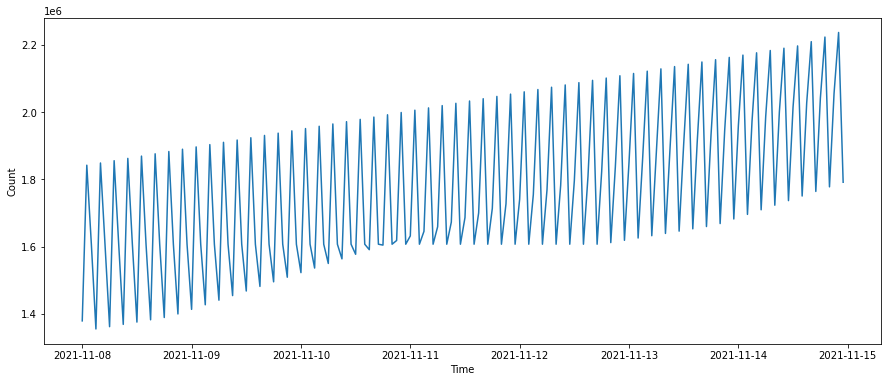

In [17]:
Hr_dist = total_records_df.groupby(pd.Grouper(freq='1H')).aggregate(np.sum)
plt.figure(figsize=(15,6))
sns.lineplot(x='Time',y='Count',data=Hr_dist)
plt.show()

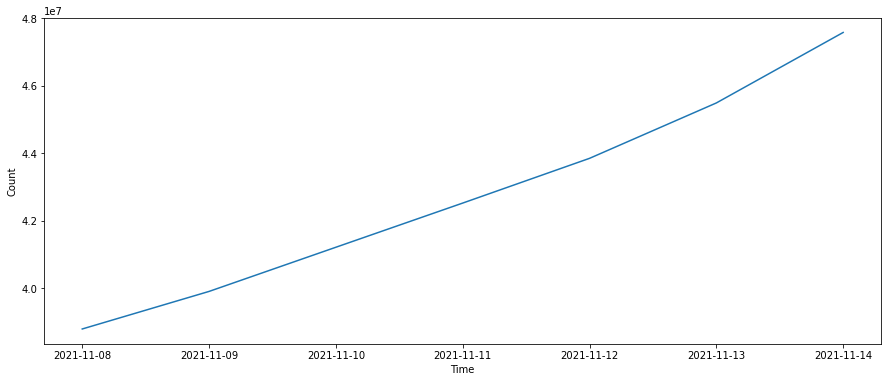

In [18]:
day_dist = total_records_df.groupby(pd.Grouper(freq='1D')).aggregate(np.sum)
plt.figure(figsize=(15,6))
sns.lineplot(x='Time',y='Count',data=day_dist)
plt.show()

In [19]:
# smooth out anomalies
def smooth_data(full_data,plot=True,verbose=True):
    for i in full_data.columns:
        outlier_smoothing(full_data[i].dropna(), plot=plot,verbose = verbose)


def outlier_smoothing(X, contamination=0.15, smoothing_window=4, plot=True, random_state=22, verbose=True):
    """
    Outlier identification by IForest and 
    smoothing by rolling window median value
    """
    X_rolling_median = X.rolling(smoothing_window).median()
    X_rolling_mean = X.rolling(smoothing_window).mean()
    X_smoothing_ratio = X / X_rolling_median

    if plot:
        plt.figure(figsize=(10,10))
        plt.plot(X.index, X, label='original')
        plt.plot(X.index, X_rolling_median, label='rolling median')
        plt.title("Original vs. Rolling Median")
        plt.legend()
        plt.show()

        plt.figure(figsize=(10,10))
        plt.plot(X.index, X_smoothing_ratio, label="original:smoothing ratio")
        plt.title("Smoothing Ratio")
        plt.legend()
        plt.show()
    
    ## Find the outliers
    iso_forest = IsolationForest(contamination=contamination,\
        random_state=random_state)
    
    peaks = np.where(iso_forest.fit_predict(X_smoothing_ratio[smoothing_window-1:].\
        values.reshape(-1,1))<1)
    
    if verbose:
        print("Outliers found at ", X.index[peaks[0]+smoothing_window-1])
    if plot:
        plt.figure(figsize=(10,10))
        plt.plot(X.index, X, label='original')
        plt.plot(X.index.values[peaks[0]+smoothing_window-1],\
            X.values[peaks[0]+smoothing_window-1], 'x'
            )
        plt.title("Outlier Finders")
        plt.legend()
        plt.show()

# Outliers in data (extreme high-low counts)

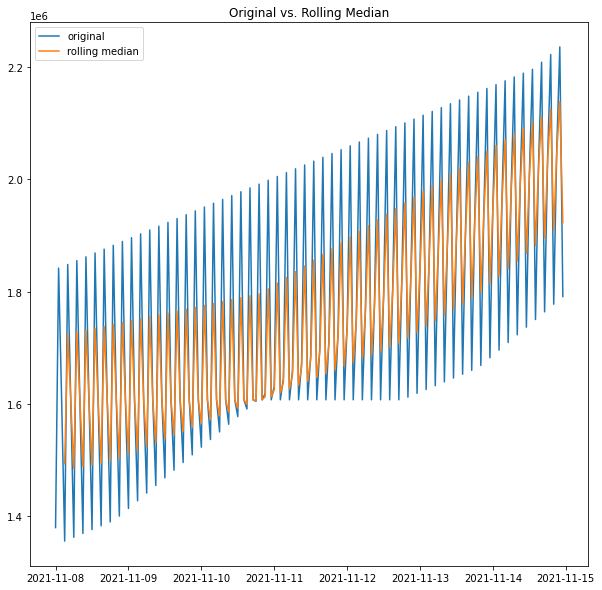

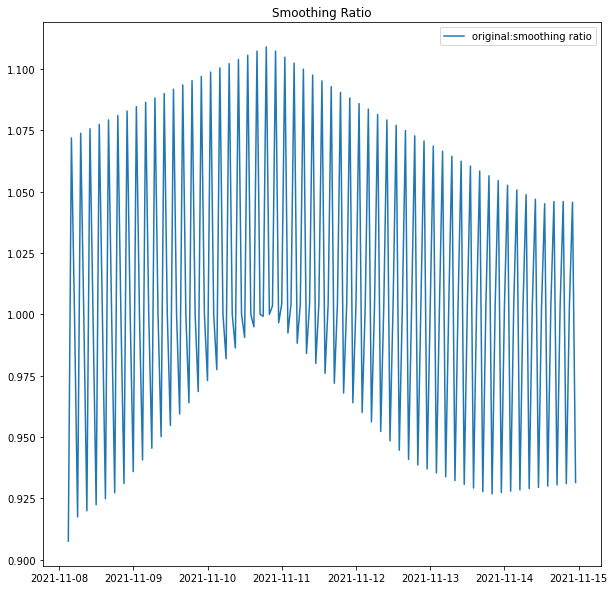

Outliers found at  DatetimeIndex(['2021-11-08 03:00:00+00:00', '2021-11-08 06:00:00+00:00',
               '2021-11-08 09:00:00+00:00', '2021-11-08 12:00:00+00:00',
               '2021-11-10 00:00:00+00:00', '2021-11-10 03:00:00+00:00',
               '2021-11-10 10:00:00+00:00', '2021-11-10 13:00:00+00:00',
               '2021-11-10 16:00:00+00:00', '2021-11-10 19:00:00+00:00',
               '2021-11-10 22:00:00+00:00', '2021-11-11 01:00:00+00:00',
               '2021-11-11 11:00:00+00:00', '2021-11-11 14:00:00+00:00',
               '2021-11-11 17:00:00+00:00', '2021-11-13 13:00:00+00:00',
               '2021-11-13 16:00:00+00:00', '2021-11-13 19:00:00+00:00',
               '2021-11-13 22:00:00+00:00', '2021-11-14 01:00:00+00:00',
               '2021-11-14 04:00:00+00:00', '2021-11-14 07:00:00+00:00',
               '2021-11-14 10:00:00+00:00', '2021-11-14 13:00:00+00:00',
               '2021-11-14 22:00:00+00:00'],
              dtype='datetime64[ns, UTC]', name='Time', freq

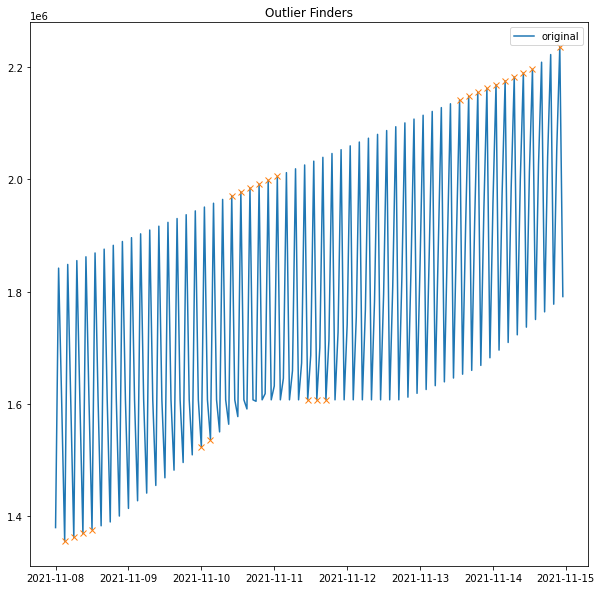

In [20]:
smooth_data(Hr_dist)

In [21]:
total_records_df['hour'] = total_records_df.index.hour

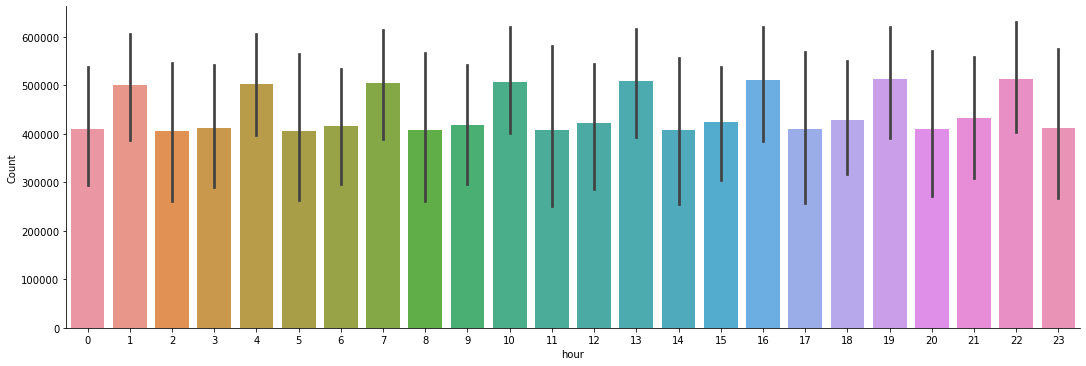

In [22]:
sns.catplot(x='hour',y='Count',data=total_records_df,kind='bar',aspect=3)

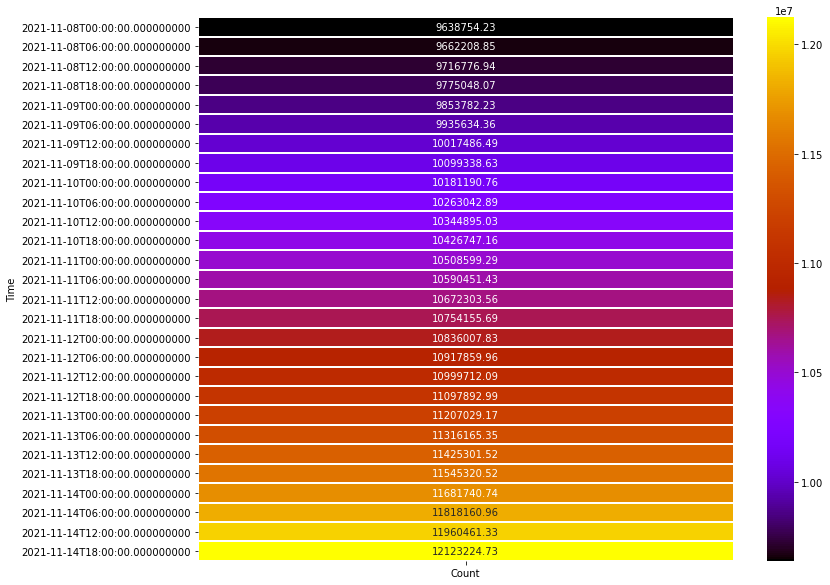

In [23]:
Hr6_dist = total_records_df.groupby(pd.Grouper(freq='6H')).aggregate(np.sum)
Hr6_dist = Hr6_dist[['Count']]
plt.figure(figsize=(12,10))
sns.heatmap(Hr6_dist,annot=True,fmt='.2f',cmap='gnuplot',linewidths=1)
plt.show()

# All Tables

In [24]:
Hr_dist = table_records_df.groupby(pd.Grouper(freq='1H')).aggregate(np.sum)
Hr6_dist = table_records_df.groupby(pd.Grouper(freq='6H')).aggregate(np.sum)
day_dist = table_records_df.groupby(pd.Grouper(freq='1D')).aggregate(np.sum)

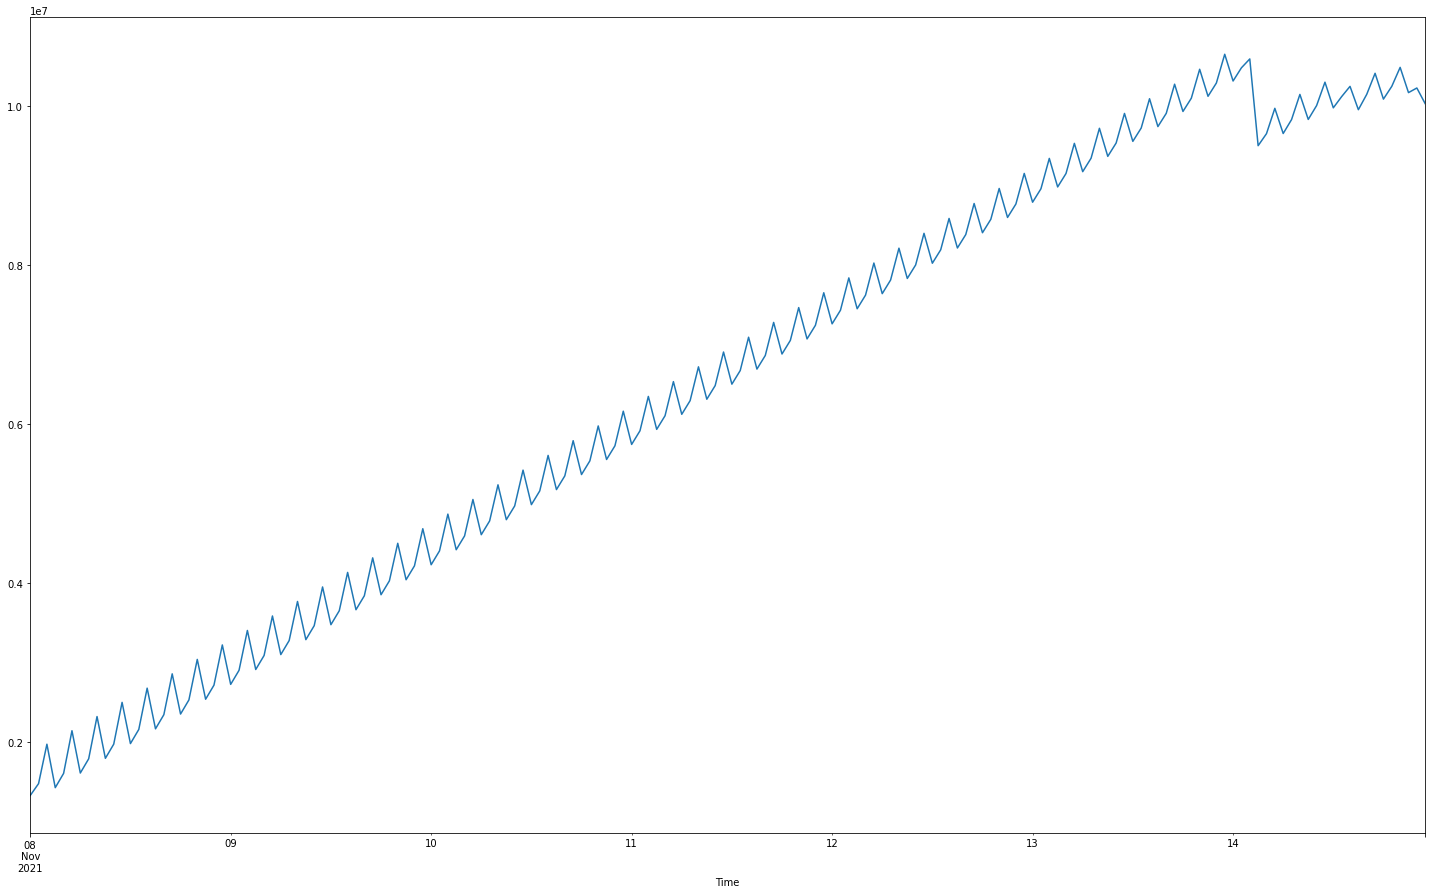

In [25]:
# hourly plot of total count
fig, ax = plt.subplots(figsize=(25,15))
Hr_dist.T.sum().plot(kind='line',ax=ax)
plt.show()

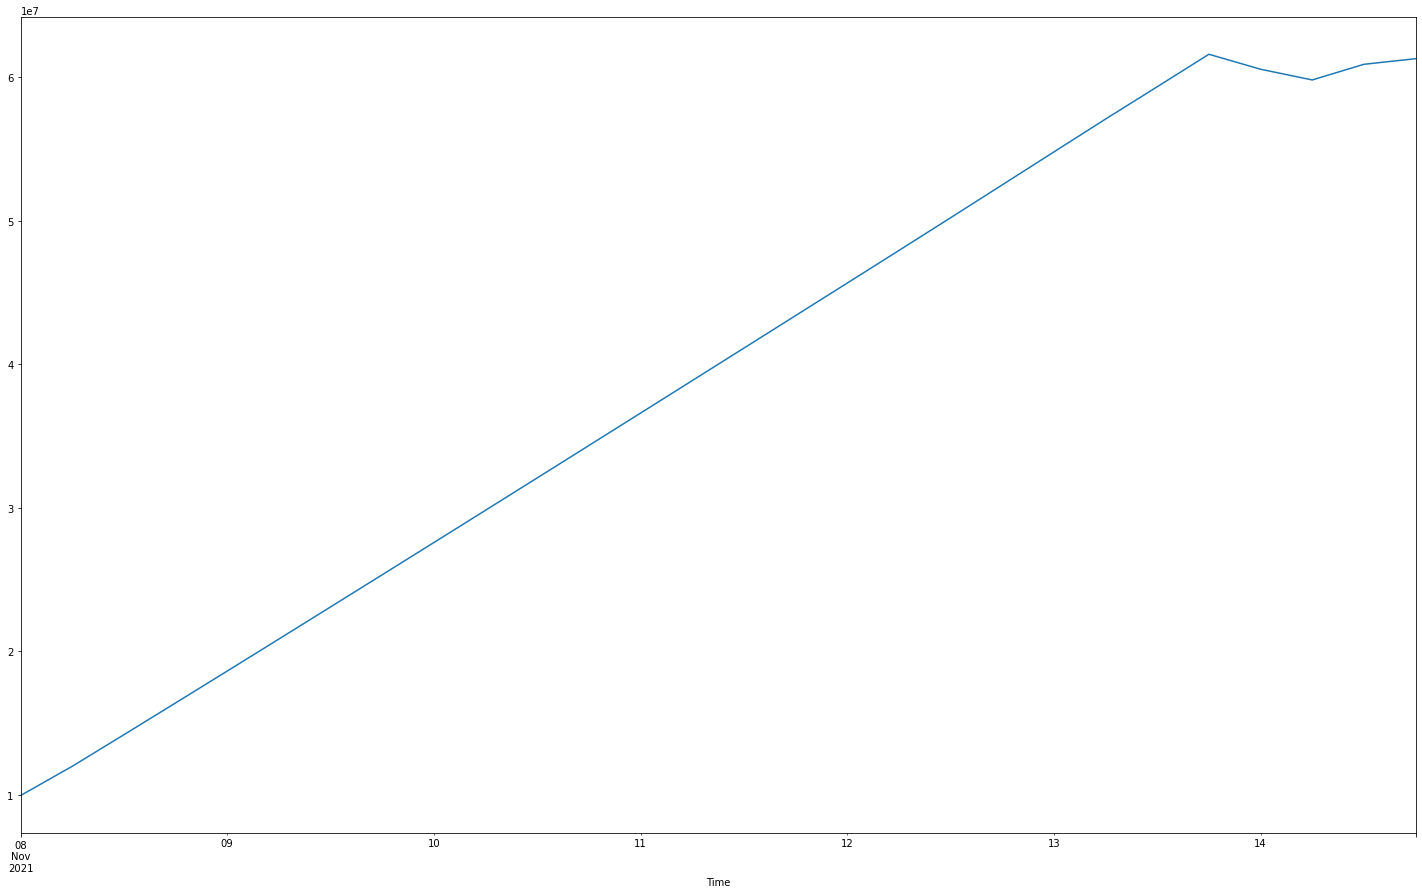

In [26]:
# 6 hourly plot of total count
fig, ax = plt.subplots(figsize=(25,15))
Hr6_dist.T.sum().plot(kind='line',ax=ax)
plt.show()

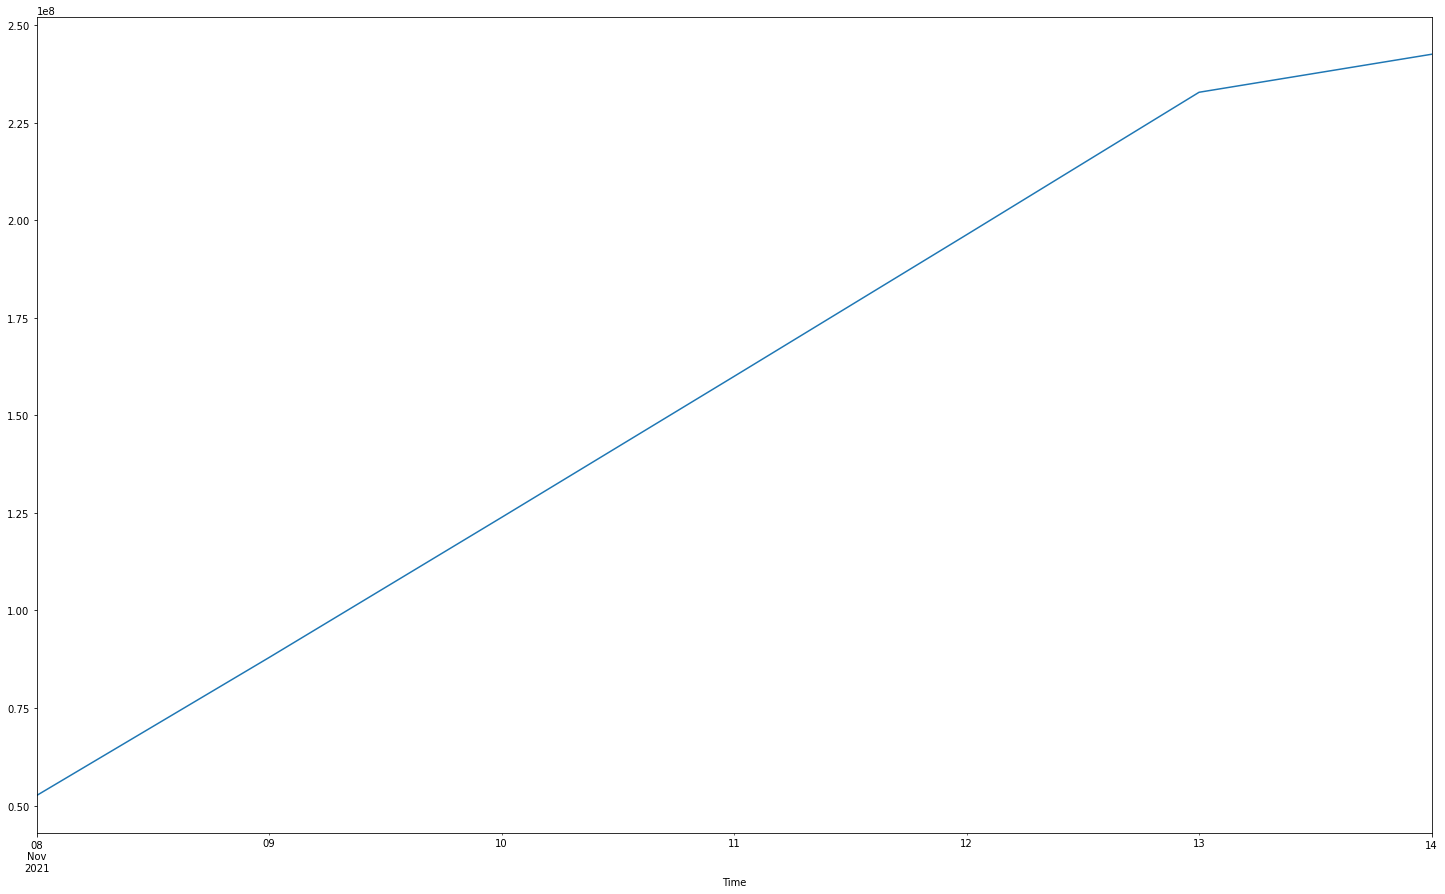

In [27]:
# Daily plot of total count
fig, ax = plt.subplots(figsize=(25,15))
day_dist.T.sum().plot(kind='line',ax=ax)
plt.show()

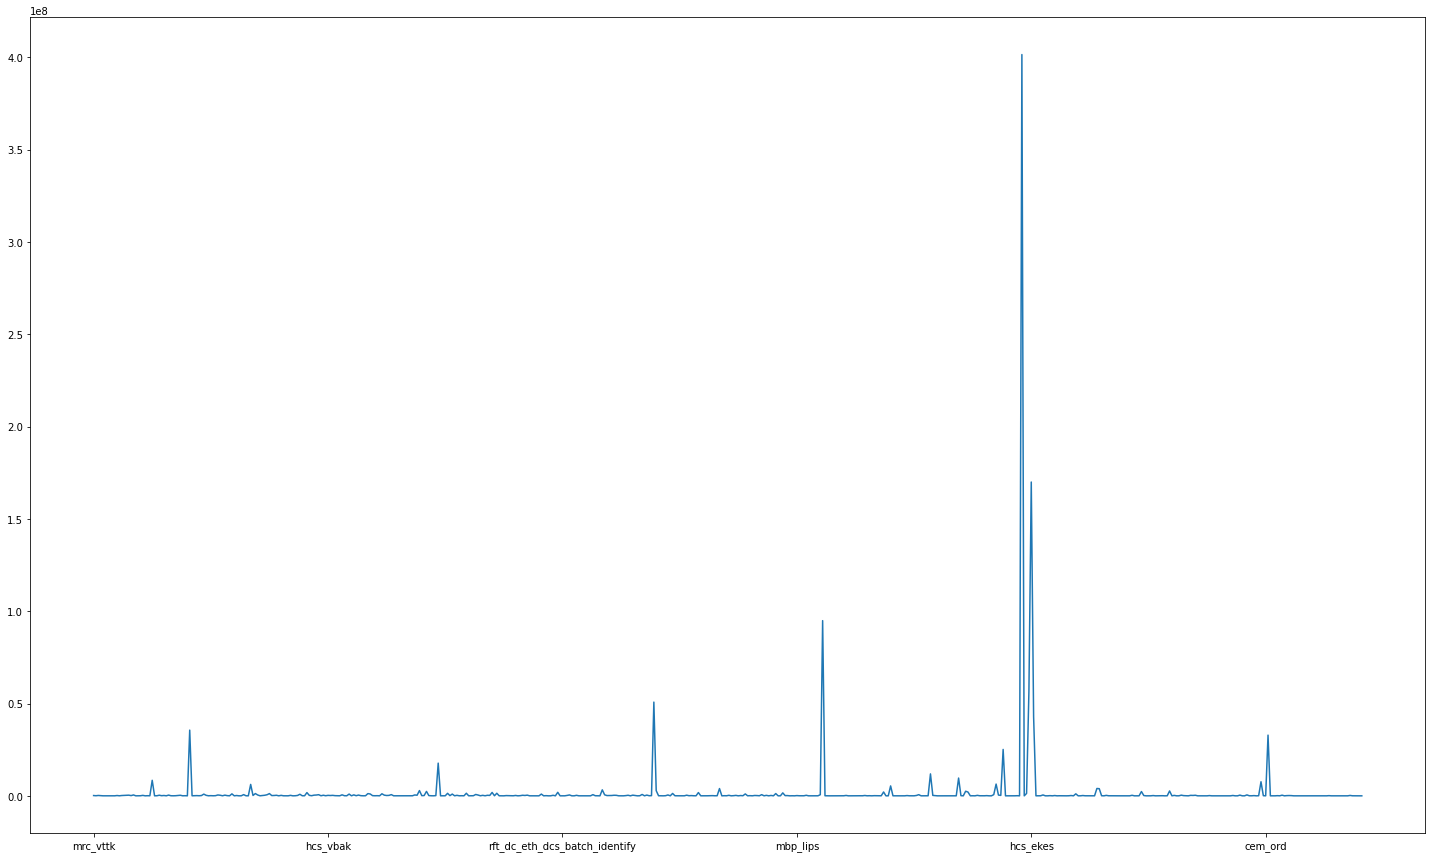

In [28]:
# weekly distibution of each table
fig, ax = plt.subplots(figsize=(25,15))
day_dist.sum().plot(kind='line',ax=ax)
plt.show()

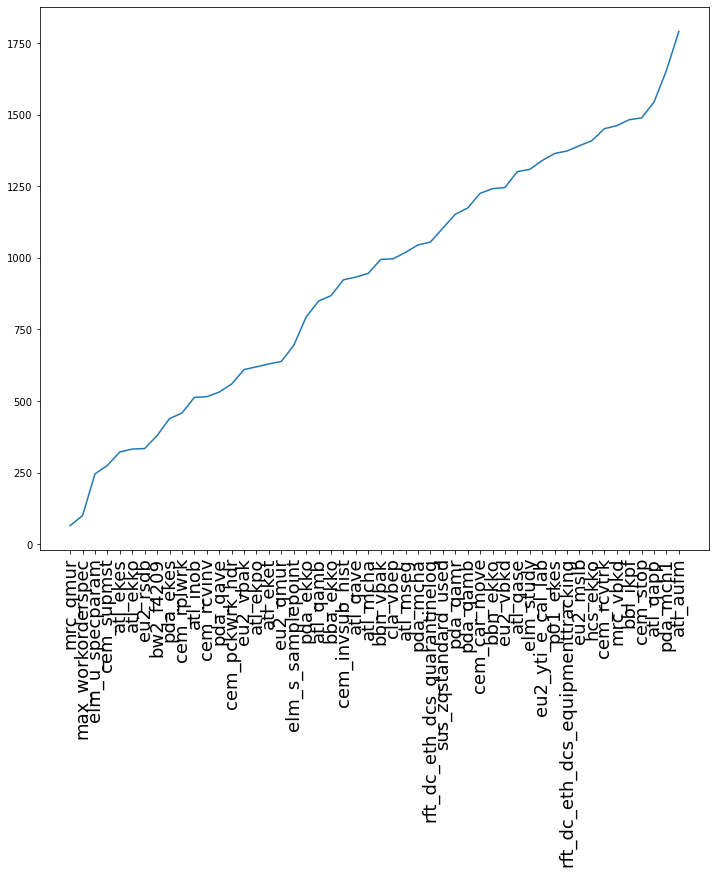

In [29]:
# bottom 50 tables
fig, ax = plt.subplots(figsize=(12,10))
day_dist.sum().sort_values().head(50).plot(kind='line',ax=ax)
plt.xticks(np.arange(0,50))
ax.set_xticklabels(list(day_dist.sum().sort_values().head(50).index), rotation='vertical', fontsize=18)
plt.show()

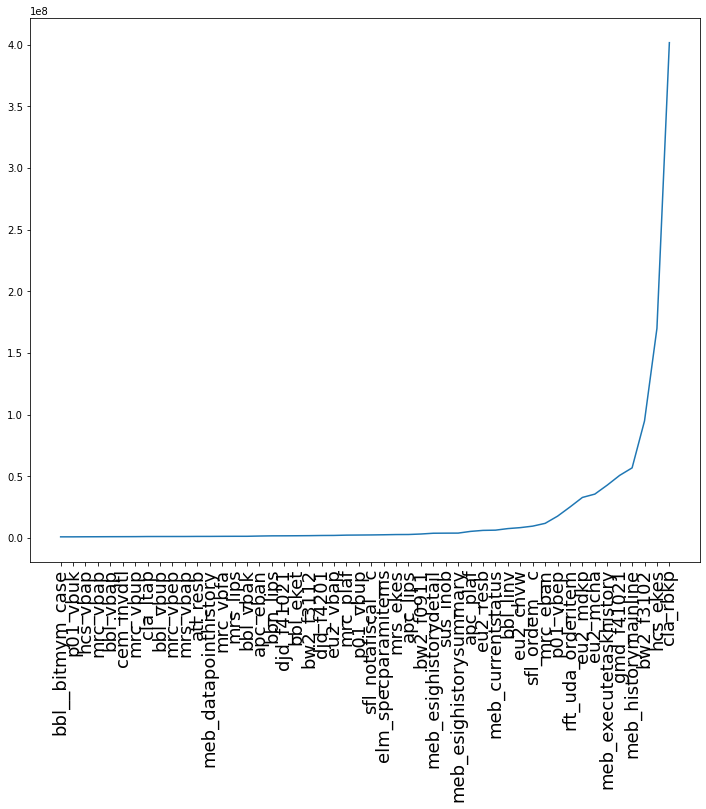

In [30]:
# top 50 tables
fig, ax = plt.subplots(figsize=(12,10))
day_dist.sum().sort_values().tail(50).plot(kind='line',ax=ax)
plt.xticks(np.arange(0,50))
ax.set_xticklabels(list(day_dist.sum().sort_values().tail(50).index), rotation='vertical', fontsize=18)
plt.show()